## **Import Important Libraries**

In [15]:
import os
import numpy as np #for linear algebra

#read the data path
import pathlib

#for visualization
import matplotlib.pyplot as plt
import seaborn as sns

#to use tensorflow and keras for the sequential model
import tensorflow as tf
import keras
from tensorflow.keras import Sequential

#for images
import imageio
import matplotlib.image as img

#data augmentation
from keras.preprocessing.image import ImageDataGenerator

## **Read the images data**

In [2]:
#read path
data_path = pathlib.Path("D:/ML Route/Rice_Image_Dataset")

In [3]:
#return files/ folders
arborio = list(data_path.glob('Arborio/*'))[:1000]
basmati = list(data_path.glob('Basmati/*'))[:1000]
ipsala = list(data_path.glob('Ipsala/*'))[:1000]
jasmine = list(data_path.glob('Jasmine/*'))[:1000]
karacadag = list(data_path.glob('Karacadag/*'))[:1000]

## **Make the Data Labels**

In [4]:
data = {
    'arborio' : arborio,
    'basmati' : basmati,
    'ipsala': ipsala,
    'jasmine' :jasmine,
    'karacadag' : karacadag,
}

In [5]:
rice_labels = {
    0: 'Arborio',
    1: 'Basmati',
    2: 'Ipsala',
    3: 'Jasmine',
    4: 'Karacadag'
}

## **Data visualization and Plotting**

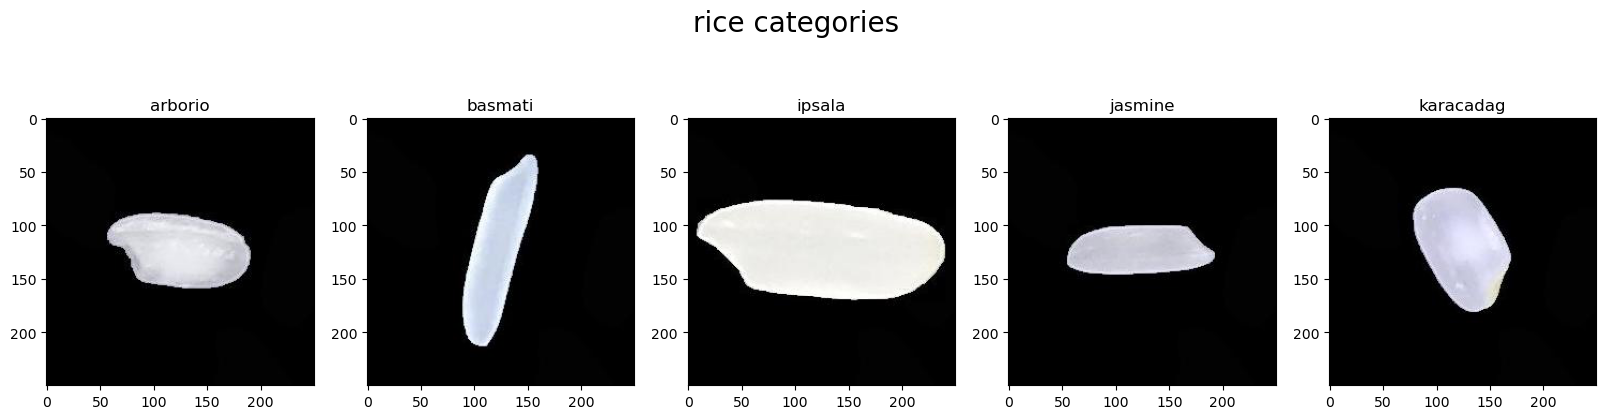

In [6]:
#define the plot properties
fig, ax = plt.subplots(ncols = 5, figsize = (20,5))
fig.suptitle("rice categories", fontsize = 20)

#read one image from every category
arborio_img = img.imread(arborio[0])
basmati_img = img.imread(basmati[0])
ipsala_img = img.imread(ipsala[0])
jasmine_img = img.imread(jasmine[0])
karacadag_img = img.imread(karacadag[0])

for index, name in enumerate(list(data.keys())):
    ax[index].set_title(name)

#show the images
ax[0].imshow(arborio_img)
ax[1].imshow(basmati_img)
ax[2].imshow(ipsala_img)
ax[3].imshow(jasmine_img)
ax[4].imshow(karacadag_img)

## **Apply Data Augmentation using ImageDataGenerator**

In [8]:
#define the ImageDataGenerator to rescale the images 
train_gen = ImageDataGenerator(rescale = 1./255, validation_split = 0.2)


#apply data augmentation on the training data with size 224 * 224
train_data = train_gen.flow_from_directory('D:/ML Route/Rice_Image_Dataset', 
                                           target_size = (224,224), 
                                           batch_size = 32,
                                           class_mode = 'categorical',
                                           shuffle = True, 
                                           subset = 'training')

#apply data augmentation on the testing data with size 224 * 224
test_data = train_gen.flow_from_directory('D:/ML Route/Rice_Image_Dataset', 
                                           target_size = (224,224), 
                                           batch_size = 1,
                                           class_mode = 'categorical',
                                           shuffle = True, 
                                           subset = 'validation')

Found 60000 images belonging to 5 classes.
Found 15000 images belonging to 5 classes.


## **Multi Layer Perceptron Model Building**

In [9]:
#model
model = Sequential()
#input layer
model.add(tf.keras.layers.Flatten())

#hidden layers with relu activation
model.add(tf.keras.layers.Dense(100, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50, activation = tf.keras.activations.relu))
model.add(tf.keras.layers.Dense(50, activation = tf.keras.activations.relu))

#output layer with sigmoid activation and 5 classes
model.add(tf.keras.layers.Dense(5, activation = tf.keras.activations.sigmoid))

In [10]:
#define callback to avoid overfitting
early_stopping = keras.callbacks.EarlyStopping(patience=5) # Set up callbacks

## **Complie and fit MLP model**

In [11]:
#compile the model with adam optimizer 
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [12]:
#fit the model with 10 epochs and callback 
model.fit(train_data, validation_data = test_data, 
          epochs = 10, callbacks=early_stopping)

Epoch 1/10
1875/1875 [==============================] - 1563s 833ms/step - loss: 0.1885 - accuracy: 0.9426 - val_loss: 0.2076 - val_accuracy: 0.9326
Epoch 2/10
1875/1875 [==============================] - 961s 512ms/step - loss: 0.0998 - accuracy: 0.9666 - val_loss: 0.0824 - val_accuracy: 0.9717
Epoch 3/10
1875/1875 [==============================] - 647s 345ms/step - loss: 0.0920 - accuracy: 0.9706 - val_loss: 0.0611 - val_accuracy: 0.9818
Epoch 4/10
1875/1875 [==============================] - 795s 424ms/step - loss: 0.0742 - accuracy: 0.9760 - val_loss: 0.0608 - val_accuracy: 0.9794
Epoch 5/10
1875/1875 [==============================] - 792s 423ms/step - loss: 0.0640 - accuracy: 0.9789 - val_loss: 0.0565 - val_accuracy: 0.9824
Epoch 6/10
1875/1875 [==============================] - 796s 425ms/step - loss: 0.0584 - accuracy: 0.9803 - val_loss: 0.0560 - val_accuracy: 0.9804
Epoch 7/10
1875/1875 [==============================] - 795s 424ms/step - loss: 0.0548 - accuracy: 0.9823 - val

## **MLP Model Prediction**

In [13]:
#model prediction
y_pred = model.predict(test_data)

15000/15000 [==============================] - 200s 13ms/step


In [14]:
#print the model prediction values
y_pred

array([[8.4684321e-14, 1.0000000e+00, 3.3771805e-11, 9.9994993e-01,
        5.9750581e-15],
       [9.9879283e-01, 5.0673509e-05, 5.8400974e-04, 1.0325574e-02,
        8.3517224e-02],
       [9.9859130e-01, 9.4459011e-07, 2.9118464e-06, 1.9424261e-03,
        7.9057878e-03],
       ...,
       [1.5054657e-01, 8.9178932e-01, 1.4781630e-02, 7.6074457e-01,
        2.3041988e-02],
       [5.1100698e-04, 5.4015768e-12, 9.9999171e-01, 2.4089620e-03,
        1.5179044e-17],
       [1.4119063e-05, 1.1726038e-20, 1.0000000e+00, 1.9200177e-05,
        1.6961514e-31]], dtype=float32)

In [16]:
#take the argmax for the predicted value
y_pred = np.argmax(y_pred, axis = 1)
y_pred

array([1, 0, 0, ..., 1, 2, 2], dtype=int64)

## **Model Evaluation**

In [17]:
#evaluate the model on training data
train_score = model.evaluate(train_data, verbose = 1)

1875/1875 [==============================] - 172s 92ms/step - loss: 0.0720 - accuracy: 0.9782


In [18]:
#evaluate the model on testing data
test_score = model.evaluate(test_data, verbose = 1)

15000/15000 [==============================] - 220s 15ms/step - loss: 0.0947 - accuracy: 0.9705
